<a href="https://colab.research.google.com/github/asksawant/kaggle-survey-2022/blob/main/data-cleaning/Script1_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# for chi-square test
import scipy.stats
from scipy.stats import chi2

# pandas setting
# for displaying all the columns
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

# Reading the files

Reading the previous survey files <br>
Dataset : Kaggle Data Science Survey 2017-2021 <br>
Link : [Dataset link](https://www.kaggle.com/datasets/andradaolteanu/kaggle-data-science-survey-20172021)

The above dataset contains all the tables merged from 2017 to 2021. Thanks to [
Andrada Olteanu](https://www.kaggle.com/andradaolteanu) for creating the dataset.This dataset was created by manually aggregating each of the 5 tables.

Kaggle survey 2022 Dataset
Link: [Dataset link](https://www.kaggle.com/competitions/kaggle-survey-2022/data)

In [ ]:
# file paths
ks_old_fp = '/content/drive/MyDrive/ml-workspace/kaggle/comp/kaggle-survey/data/kaggle-survey-2017-2021/kaggle_survey_2017_2021.csv'
ks_new_fp = '/content/drive/MyDrive/ml-workspace/kaggle/comp/kaggle-survey/data/kaggle-survey-2022/kaggle_survey_2022_responses.csv'

In [ ]:
kso = pd.read_csv(ks_old_fp, low_memory=False)
ksn = pd.read_csv(ks_new_fp, low_memory=False)

In [ ]:
kso.head(2)

- Time from Start to Finish (seconds)                           Q1  \
0  Year               Duration (in seconds)  What is your age (# years)?   
1  2021                                 910                        50-54   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                     Man   

                                          Q3  \
0  In which country do you currently reside?   
1                                      India   

                                                  Q4  \
0  What is the highest level of formal education ...   
1                                Bachelorâ€™s degree   

                                                  Q5  \
0  Select the title most similar to your current ...   
1                                              Other   

                                                  Q6  \
0  For how many years have you been writing code ...   
1                                         5-10 years   

                                           Q7_Part_1  \
0  What programming languages do you use on a reg...   
1                                             Python   

                                           Q7_Part_2  \
0  What programming languages do you use on a reg...   
1                                                  R   

                                           Q7_Part_3  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                           Q7_Part_4  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                           Q7_Part_5  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                           Q7_Part_6  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                           Q7_Part_7  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                           Q7_Part_8  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                           Q7_Part_9  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                          Q7_Part_10  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                          Q7_Part_11  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                          Q7_Part_12  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                            Q7_OTHER  \
0  What programming languages do you use on a reg...   
1                                                NaN   

                                                  Q8  \
0  What programming language would you recommend ...   
1                                             Python   

                                           Q9_Part_1  \
0  Which of the following integrated development ...   
1                                                NaN   

                                           Q9_Part_2  \
0  Which of the following integrated development ...   
1                                                NaN   

                                           Q9_Part_3  \
0  Which of the following integrated development ...   
1                                                NaN   

                                           Q9_Part_5  \
0  Which of the following integrated development ...   
1   

In [ ]:
ksn.head(2)

Duration (in seconds)                           Q2  \
0  Duration (in seconds)  What is your age (# years)?   
1                    121                        30-34   

                                       Q3  \
0  What is your gender? - Selected Choice   
1                                     Man   

                                          Q4  \
0  In which country do you currently reside?   
1                                      India   

                                                  Q5  \
0  Are you currently a student? (high school, uni...   
1                                                 No   

                                                Q6_1  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_2  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_3  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_4  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_5  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_6  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_7  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_8  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_9  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                               Q6_10  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                               Q6_11  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                               Q6_12  \
0  On which platforms have you begun or completed...   
1                                              Other   

                                                Q7_1  \
0  What products or platforms did you find to be ...   
1                                                NaN   

                                                Q7_2  \
0  What products or platforms did you find to be ...   
1                                                NaN   

                                                Q7_3  \
0  What products or platforms did you find to be ...   
1                                                NaN   

                                                Q7_4  \
0  What products or platforms did you find to be ...   
1                                                NaN   

                                                Q7_5  \
0  What products or platforms did you find to be ...   
1                                                NaN   

                                                Q7_6  \
0  What products or platforms did you find to be ...   
1                                                NaN   

                                                Q7_7  \
0  What products or platforms did you find to be ...   
1                                                NaN   

                                                  Q8  \
0  What is the highest level of formal education ...   
1                                                NaN   

 

Saving the questions files to check the similar questions.

In [ ]:
ksoq = kso.iloc[0:2,:]
ksnq = ksn.iloc[0:2,:]

In [ ]:
ksoq.to_csv('/content/drive/MyDrive/ml-workspace/kaggle/comp/kaggle-survey/data/ks_questions/kso_questions.csv',index=False)
ksnq.to_csv('/content/drive/MyDrive/ml-workspace/kaggle/comp/kaggle-survey/data/ks_questions/ksn_questions.csv',index=False)

# Methodology

- Latest survey dataset 2022 was taken as reference and after analyzing the previous survey question/answer one by one manually where added to latest dataset if found similar.

- Each entry can be uniquely identified using the `sid` column. `sid` is combination of `year` and `index` of that year.

In [ ]:
ksn.shape

(23998, 296)

In [ ]:
kso.shape

(106302, 293)

Formating the new kaggle survey file<br>
Removing the first row as we have all questions noted in excel

In [ ]:
ksn = ksn.iloc[1:,:]

In [ ]:
ksn.reset_index(inplace=True)

Adding the year column

In [ ]:
ksn['Year'] = 2022
ksn['Year'] = ksn['Year'].astype(int)

Creating the survey id as sid

In [ ]:
ksn['sid'] = ksn['Year'].astype(str) + '_' + ksn['index'].astype(str)

Moving the columns to the start

In [ ]:
year = ksn['Year']
ksn.drop(labels=['Year'], axis=1,inplace = True)
ksn.insert(0, 'Year', year)

In [ ]:
sid = ksn['sid']
ksn.drop(labels=['sid'], axis=1,inplace = True)
ksn.insert(0, 'sid', sid)

In [ ]:
ksn.drop(labels=['index'], axis=1,inplace = True)

In [ ]:
ksn.shape

(23997, 298)

In [ ]:
ksn.rename(columns = {'Duration (in seconds)':'duration'},inplace=True)

In [ ]:
ksn.head(2)

sid  Year duration     Q2   Q3       Q4  Q5 Q6_1 Q6_2 Q6_3 Q6_4 Q6_5  \
0  2022_1  2022      121  30-34  Man    India  No  NaN  NaN  NaN  NaN  NaN   
1  2022_2  2022      462  30-34  Man  Algeria  No  NaN  NaN  NaN  NaN  NaN   

  Q6_6 Q6_7 Q6_8 Q6_9                                              Q6_10  \
0  NaN  NaN  NaN  NaN                                                NaN   
1  NaN  NaN  NaN  NaN  University Courses (resulting in a university ...   

  Q6_11  Q6_12                Q7_1 Q7_2 Q7_3 Q7_4  \
0   NaN  Other                 NaN  NaN  NaN  NaN   
1   NaN    NaN  University courses  NaN  NaN  NaN   

                                    Q7_5 Q7_6 Q7_7               Q8   Q9  \
0                                    NaN  NaN  NaN              NaN  NaN   
1  Kaggle (notebooks, competitions, etc)  NaN  NaN  Master’s degree  Yes   

  Q10_1 Q10_2 Q10_3        Q11 Q12_1 Q12_2 Q12_3 Q12_4 Q12_5 Q12_6 Q12_7  \
0   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN    No  1-3 years   NaN   NaN   NaN   NaN   NaN   NaN  Java   

  Q12_8 Q12_9 Q12_10 Q12_11 Q12_12 Q12_13 Q12_14 Q12_15 Q13_1 Q13_2 Q13_3  \
0   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   
1   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   NaN   

  Q13_4 Q13_5 Q13_6          Q13_7 Q13_8 Q13_9 Q13_10 Q13_11 Q13_12 Q13_13  \
0   NaN   NaN   NaN            NaN   NaN   NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN   NaN    Notepad++     NaN   NaN    NaN    NaN    NaN    NaN   

  Q13_14 Q14_1 Q14_2 Q14_3 Q14_4 Q14_5 Q14_6 Q14_7 Q14_8 Q14_9 Q14_10 Q14_11  \
0    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
1  Other   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   

  Q14_12 Q14_13 Q14_14 Q14_15 Q14_16         Q15_1 Q15_2 Q15_3 Q15_4 Q15_5  \
0    NaN    NaN    NaN    NaN    NaN           NaN   NaN   NaN   NaN   NaN   
1    NaN    NaN    NaN   None    NaN   Matplotlib    NaN   NaN   NaN   NaN   

  Q15_6 Q15_7 Q15_8 Q15_9 Q15_10 Q15_11 Q15_12 Q15_13 Q15_14 Q15_15  \
0   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1   NaN   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

            Q16            Q17_1          Q17_2 Q17_3      Q17_4 Q17_5 Q17_6  \
0           NaN              NaN            NaN   NaN        NaN   NaN   NaN   
1  Under 1 year    Scikit-learn     TensorFlow    NaN   PyTorch    NaN   NaN   

  Q17_7 Q17_8 Q17_9 Q17_10 Q17_11 Q17_12 Q17_13 Q17_14 Q17_15 Q18_1 Q18_2  \
0   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   
1   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN   NaN   

  Q18_3                Q18_4 Q18_5 Q18_6 Q18_7 Q18_8 Q18_9 Q18_10 Q18_11  \
0   NaN                  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
1   NaN  Bayesian Approaches   NaN   NaN   NaN   NaN   NaN    NaN    NaN   

  Q18_12 Q18_13 Q18_14 Q19_1 Q19_2 Q19_3 Q19_4 Q19_5 Q19_6 Q19_7 Q19_8 Q20_1  \
0    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1    NaN    NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

  Q20_2 Q20_3 Q20_4 Q20_5 Q20_6 Q21_1 Q21_2 Q21_3 Q21_4 Q21_5 Q21_6 Q21_7  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

  Q21_8                                              Q21_9 Q21_10  Q22  Q23  \
0   NaN                                                NaN    NaN  NaN  NaN   
1   NaN  No, I do not download pre-trained model weight...    NaN  NaN  NaN   

   Q24  Q25  Q26  Q27 Q28_1 Q28_2 Q28_3 Q28_4 Q28_5 Q28_6 Q28_7 Q28_8  Q29  \
0  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   
1  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  NaN   

   Q30 Q31_1 Q31_2 Q31_3 Q31_4 Q31_5 Q31_6 Q31_7 Q31_8 Q31_9 Q31_10 Q31_11  \
0  NaN   NaN   NaN   NaN   NaN   NaN   Na

Formating the old kaggle survey file

In [ ]:
kso.rename(columns = {'-':'Year','Time from Start to Finish (seconds)':'duration'},inplace=True)

In [ ]:
kso.shape

(106302, 293)

In [ ]:
kso = kso.iloc[1:,:]
kso.reset_index(inplace=True)
kso['sid'] = kso['Year'].astype(str) + '_' + kso['index'].astype(str)

sid = kso['sid']
kso.drop(labels=['sid'], axis=1,inplace = True)
kso.insert(0, 'sid', sid)

In [ ]:
kso.drop(labels=['index'], axis=1,inplace = True)

In [ ]:
kso.shape

(106301, 294)

In [ ]:
kso.head(2)

sid  Year duration     Q1   Q2         Q3                   Q4  \
0  2021_1  2021      910  50-54  Man      India  Bachelorâ€™s degree   
1  2021_2  2021      784  50-54  Man  Indonesia    Masterâ€™s degree   

                        Q5          Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
0                    Other  5-10 years    Python         R       NaN   
1  Program/Project Manager   20+ years       NaN       NaN       SQL   

  Q7_Part_4 Q7_Part_5 Q7_Part_6 Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10  \
0       NaN       NaN       NaN       NaN       NaN       NaN        NaN   
1         C       C++      Java       NaN       NaN       NaN        NaN   

  Q7_Part_11 Q7_Part_12 Q7_OTHER      Q8 Q9_Part_1 Q9_Part_2 Q9_Part_3  \
0        NaN        NaN      NaN  Python       NaN       NaN       NaN   
1        NaN        NaN      NaN  Python       NaN       NaN       NaN   

  Q9_Part_5 Q9_Part_6      Q9_Part_7 Q9_Part_8        Q9_Part_9 Q9_Part_10  \
0       NaN       NaN            NaN       NaN    Vim / Emacs          NaN   
1       NaN       NaN    Notepad++         NaN              NaN        NaN   

  Q9_Part_12 Q9_OTHER         Q10_Part_1       Q10_Part_2 Q10_Part_3  \
0        NaN      NaN                NaN  Colab Notebooks        NaN   
1        NaN      NaN   Kaggle Notebooks  Colab Notebooks        NaN   

  Q10_Part_4 Q10_Part_5 Q10_Part_6 Q10_Part_7 Q10_Part_8 Q10_Part_9  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   

  Q10_Part_10 Q10_Part_11 Q10_Part_12 Q10_Part_16 Q10_OTHER  \
0         NaN         NaN         NaN         NaN       NaN   
1         NaN         NaN         NaN         NaN       NaN   

                                                 Q11 Q12new Q12_Part_1  \
0                                           A laptop    NaN        NaN   
1  A cloud computing platform (AWS, Azure, GCP, h...    NaN        NaN   

            Q12_Part_2 Q12_Part_5 Q12_OTHER        Q13    Q14_Part_1  \
0   Google Cloud TPUs         NaN       NaN  2-5 times   Matplotlib    
1                  NaN       None       NaN      Never   Matplotlib    

  Q14_Part_2 Q14_Part_3          Q14_Part_4 Q14_Part_5 Q14_Part_6 Q14_Part_7  \
0   Seaborn         NaN   Ggplot / ggplot2      Shiny         NaN        NaN   
1        NaN        NaN                 NaN        NaN        NaN        NaN   

  Q14_Part_8 Q14_Part_9         Q14_Part_10 Q14_Part_11 Q14_OTHER  \
0        NaN        NaN   Leaflet / Folium          NaN       NaN   
1        NaN        NaN                 NaN         NaN       NaN   

            Q15       Q16_Part_1     Q16_Part_2 Q16_Part_3 Q16_Part_4  \
0    5-10 years    Scikit-learn     TensorFlow         NaN        NaN   
1  Under 1 year    Scikit-learn             NaN        NaN        NaN   

  Q16_Part_5 Q16_Part_6 Q16_Part_7 Q16_Part_8 Q16_Part_9 Q16_Part_10  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1        NaN        NaN        NaN        NaN        NaN         NaN   

  Q16_Part_11 Q16_Part_12 Q16_Part_13 Q16_Part_14 Q16_Part_17 Q16_OTHER  \
0         NaN      Caret          NaN         NaN         NaN       NaN   
1         NaN         NaN         NaN         NaN         NaN       NaN   

                      Q17_Part_1                        Q17_Part_2  \
0  Linear or Logistic Regression  Decision Trees or Random Forests   
1  Linear or Logistic Regression  Decision Trees or Random Forests   

                                          Q17_Part_3           Q17_Part_4  \
0  Gradient Boosting Machines (xgboost, lightgbm,...  Bayesian Approaches   
1                                                NaN                  NaN   

  Q17_Part_5                         Q17_Part_6  \
0        NaN  Dense Neural Networks (MLPs, etc)   
1        NaN                                NaN   

                      Q17_Part_7 Q17_Part_8                 Q17_Part_9  \
0  Convolutional Neural Networks        N

Rename the columns of the new kaggle survey dataframe

In [ ]:
# new columns names list
slist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296]
# old columns names list
nlist = ['duration','Q2','Q3','Q4','Q5','Q6_1','Q6_2','Q6_3','Q6_4','Q6_5','Q6_6','Q6_7','Q6_8','Q6_9','Q6_10','Q6_11','Q6_12','Q7_1','Q7_2','Q7_3','Q7_4','Q7_5','Q7_6','Q7_7','Q8','Q9','Q10_1','Q10_2','Q10_3','Q11','Q12_1','Q12_2','Q12_3','Q12_4','Q12_5','Q12_6','Q12_7','Q12_8','Q12_9','Q12_10','Q12_11','Q12_12','Q12_13','Q12_14','Q12_15','Q13_1','Q13_2','Q13_3','Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_10','Q13_11','Q13_12','Q13_13','Q13_14','Q14_1','Q14_2','Q14_3','Q14_4','Q14_5','Q14_6','Q14_7','Q14_8','Q14_9','Q14_10','Q14_11','Q14_12','Q14_13','Q14_14','Q14_15','Q14_16','Q15_1','Q15_2','Q15_3','Q15_4','Q15_5','Q15_6','Q15_7','Q15_8','Q15_9','Q15_10','Q15_11','Q15_12','Q15_13','Q15_14','Q15_15','Q16','Q17_1','Q17_2','Q17_3','Q17_4','Q17_5','Q17_6','Q17_7','Q17_8','Q17_9','Q17_10','Q17_11','Q17_12','Q17_13','Q17_14','Q17_15','Q18_1','Q18_2','Q18_3','Q18_4','Q18_5','Q18_6','Q18_7','Q18_8','Q18_9','Q18_10','Q18_11','Q18_12','Q18_13','Q18_14','Q19_1','Q19_2','Q19_3','Q19_4','Q19_5','Q19_6','Q19_7','Q19_8','Q20_1','Q20_2','Q20_3','Q20_4','Q20_5','Q20_6','Q21_1','Q21_2','Q21_3','Q21_4','Q21_5','Q21_6','Q21_7','Q21_8','Q21_9','Q21_10','Q22','Q23','Q24','Q25','Q26','Q27','Q28_1','Q28_2','Q28_3','Q28_4','Q28_5','Q28_6','Q28_7','Q28_8','Q29','Q30','Q31_1','Q31_2','Q31_3','Q31_4','Q31_5','Q31_6','Q31_7','Q31_8','Q31_9','Q31_10','Q31_11','Q31_12','Q32','Q33_1','Q33_2','Q33_3','Q33_4','Q33_5','Q34_1','Q34_2','Q34_3','Q34_4','Q34_5','Q34_6','Q34_7','Q34_8','Q35_1','Q35_2','Q35_3','Q35_4','Q35_5','Q35_6','Q35_7','Q35_8','Q35_9','Q35_10','Q35_11','Q35_12','Q35_13','Q35_14','Q35_15','Q35_16','Q36_1','Q36_2','Q36_3','Q36_4','Q36_5','Q36_6','Q36_7','Q36_8','Q36_9','Q36_10','Q36_11','Q36_12','Q36_13','Q36_14','Q36_15','Q37_1','Q37_2','Q37_3','Q37_4','Q37_5','Q37_6','Q37_7','Q37_8','Q37_9','Q37_10','Q37_11','Q37_12','Q37_13','Q38_1','Q38_2','Q38_3','Q38_4','Q38_5','Q38_6','Q38_7','Q38_8','Q39_1','Q39_2','Q39_3','Q39_4','Q39_5','Q39_6','Q39_7','Q39_8','Q39_9','Q39_10','Q39_11','Q39_12','Q40_1','Q40_2','Q40_3','Q40_4','Q40_5','Q40_6','Q40_7','Q40_8','Q40_9','Q40_10','Q40_11','Q40_12','Q40_13','Q40_14','Q40_15','Q41_1','Q41_2','Q41_3','Q41_4','Q41_5','Q41_6','Q41_7','Q41_8','Q41_9','Q42_1','Q42_2','Q42_3','Q42_4','Q42_5','Q42_6','Q42_7','Q42_8','Q42_9','Q43','Q44_1','Q44_2','Q44_3','Q44_4','Q44_5','Q44_6','Q44_7','Q44_8','Q44_9','Q44_10','Q44_11','Q44_12']

In [ ]:
# creating a dict of the two list
ndict = dict(zip(nlist, slist))
print(ndict)

{'duration': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4, 'Q5': 5, 'Q6_1': 6, 'Q6_2': 7, 'Q6_3': 8, 'Q6_4': 9, 'Q6_5': 10, 'Q6_6': 11, 'Q6_7': 12, 'Q6_8': 13, 'Q6_9': 14, 'Q6_10': 15, 'Q6_11': 16, 'Q6_12': 17, 'Q7_1': 18, 'Q7_2': 19, 'Q7_3': 20, 'Q7_4': 21, 'Q7_5': 22, 'Q7_6': 23, 'Q7_7': 24, 'Q8': 25, 'Q9': 26, 'Q10_1': 27, 'Q10_2': 28, 'Q10_3': 29, 'Q11': 30, 'Q12_1': 31, 'Q12_2': 32, 'Q12_3': 33, 'Q12_4': 34, 'Q12_5': 35, 'Q12_6': 36, 'Q12_7': 37, 'Q12_8': 38, 'Q12_9': 39, 'Q12_10': 40, 'Q12_11': 41, 'Q12_12': 42, 'Q12_13': 43, 'Q12_14': 44, 'Q12_15': 45, 'Q13_1': 46, 'Q13_2': 47, 'Q13_3': 48, 'Q13_4': 49, 'Q13_5': 50, 'Q13_6': 51, 'Q13_7': 52, 'Q13_8': 53, 'Q13_9': 54, 'Q13_10': 55, 'Q13_11': 56, 'Q13_12': 57, 'Q13_13': 58, 'Q13_14': 59, 'Q14_1': 60, 'Q14_2': 61, 'Q14_3': 62, 'Q14_4': 63, 'Q14_5': 64, 'Q14_6': 65, 'Q14_7': 66, 'Q14_8': 67, 'Q14_9': 68, 'Q14_10': 69, 'Q14_11': 70, 'Q14_12': 71, 'Q14_13': 72, 'Q14_14': 73, 'Q14_15': 74, 'Q14_16': 75, 'Q15_1': 76, 'Q15_2': 77, 'Q15_3': 78, 'Q15_4': 

In [ ]:
# renaming the column using dict
ksn.rename(columns=ndict,inplace=True)

In [ ]:
ksn.head(2)

sid  Year    1      2    3        4   5    6    7    8    9   10   11  \
0  2022_1  2022  121  30-34  Man    India  No  NaN  NaN  NaN  NaN  NaN  NaN   
1  2022_2  2022  462  30-34  Man  Algeria  No  NaN  NaN  NaN  NaN  NaN  NaN   

    12   13   14                                                 15   16  \
0  NaN  NaN  NaN                                                NaN  NaN   
1  NaN  NaN  NaN  University Courses (resulting in a university ...  NaN   

      17                  18   19   20   21  \
0  Other                 NaN  NaN  NaN  NaN   
1    NaN  University courses  NaN  NaN  NaN   

                                      22   23   24               25   26   27  \
0                                    NaN  NaN  NaN              NaN  NaN  NaN   
1  Kaggle (notebooks, competitions, etc)  NaN  NaN  Master’s degree  Yes  NaN   

    28   29         30   31   32   33   34   35   36    37   38   39   40  \
0  NaN  NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN   
1  NaN   No  1-3 years  NaN  NaN  NaN  NaN  NaN  NaN  Java  NaN  NaN  NaN   

    41   42   43   44   45   46   47   48   49   50   51             52   53  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN            NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    Notepad++    NaN   

    54   55   56   57   58     59   60   61   62   63   64   65   66   67  \
0  NaN  NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  Other  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    68   69   70   71   72   73    74   75            76   77   78   79   80  \
0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN           NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  None  NaN   Matplotlib   NaN  NaN  NaN  NaN   

    81   82   83   84   85   86   87   88   89   90            91  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN           NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Under 1 year   

                92             93   94         95   96   97   98   99  100  \
0              NaN            NaN  NaN        NaN  NaN  NaN  NaN  NaN  NaN   
1    Scikit-learn     TensorFlow   NaN   PyTorch   NaN  NaN  NaN  NaN  NaN   

   101  102  103  104  105  106  107  108  109                  110  111  112  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN                  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Bayesian Approaches  NaN  NaN   

   113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                                 143  144  145  146  147  148  \
0                                                NaN  NaN  NaN  NaN  NaN  NaN   
1  No, I do not download pre-trained model weight...  NaN  NaN  NaN  NaN  NaN   

   149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   194  195  196  197  198  199  200  201  202  203  204  205  206  207

Renaming the old survey dataframe<br>
Columns that were found similar to 2022 survey in previous survey dataset

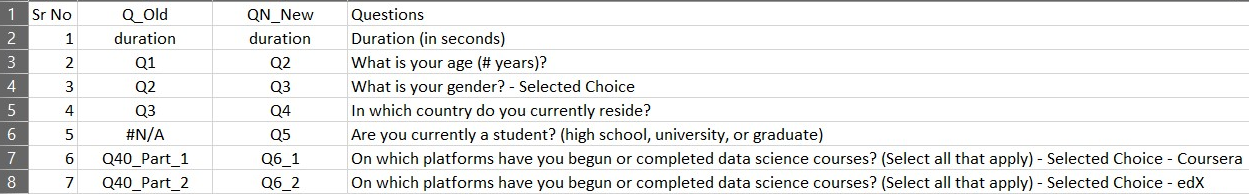

Steps
1. Download the excel file having list of all the question
    - New Survey table - Columns of excel file `QN_New`,`Questions`
    - Old Survey table - Columns of excel file `Q_Old`, `Questions`
2. Add New column name `Sr No` to New Survey table
3. Manually match questions from new survey table and old survey table. Keeping new survey as base.
    - If the question is present in old survey - write the question number in new column `Q_Old`
    - If the question is not present in old survey - leave it blank
4. Rename the new kaggle survey and old kaggle survey dataframe with the `Sr No`

Note:
The list was created using concat in excel or using formula `[old_value]&"','"&[new_value]`

In [ ]:
# new column names list
oslist = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,25,30,31,32,33,34,36,37,38,39,41,42,44,45,46,47,48,50,51,52,53,54,55,58,59,60,61,62,63,64,65,67,68,71,74,75,76,77,78,79,80,81,82,83,84,85,89,90,91,92,93,94,95,96,97,98,99,100,101,102,105,106,107,108,109,110,111,112,113,114,115,116,119,120,121,122,123,124,125,127,128,129,130,131,132,133,134,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,171,172,187,188,189,190,191,192,193,194,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,216,217,218,219,229,230,231,232,233,234,237,238,251,252,253,254,255,264,265,284,285,286,287,288,289,290,291,292,293,294,295,296]
# old column names list
olist = ['duration','Q1','Q2','Q3','Q40_Part_1','Q40_Part_2','Q40_Part_3','Q40_Part_4','Q40_Part_5','Q40_Part_6','Q40_Part_7','Q40_Part_8','Q40_Part_9','Q40_Part_10','Q40_Part_11','Q40_OTHER','Q4','Q6','Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_10','Q7_Part_11','Q7_Part_8','Q7_Part_12','Q7_OTHER','Q9_Part_1','Q9_Part_2','Q9_Part_3','Q9_Part_5','Q9_Part_6','Q9_Part_7','Q9_Part_8','Q9_Part_9','Q9_Part_10','Q9_Part_12','Q9_OTHER','Q10_Part_1','Q10_Part_2','Q10_Part_3','Q10_Part_6','Q10_Part_7','Q10_Part_8','Q10_Part_9','Q10_Part_10','Q10_Part_12','Q10_Part_16','Q10_OTHER','Q14_Part_1','Q14_Part_2','Q14_Part_3','Q14_Part_4','Q14_Part_5','Q14_Part_6','Q14_Part_7','Q14_Part_8','Q14_Part_9','Q14_Part_10','Q14_Part_11','Q14_OTHER','Q15','Q16_Part_1','Q16_Part_2','Q16_Part_3','Q16_Part_4','Q16_Part_5','Q16_Part_7','Q16_Part_8','Q16_Part_9','Q16_Part_12','Q16_Part_13','Q16_Part_14','Q16_Part_17','Q16_OTHER','Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5','Q17_Part_6','Q17_Part_7','Q17_Part_8','Q17_Part_9','Q17_Part_10','Q17_Part_11','Q17_OTHER','Q18_Part_1','Q18_Part_2','Q18_Part_3','Q18_Part_4','Q18_Part_5','Q18_Part_6','Q18_OTHER','Q19_Part_1','Q19_Part_2','Q19_Part_3','Q19_Part_4','Q19_Part_5','Q19_OTHER','Q5','Q20','Q21','Q22','Q23','Q24_Part_1','Q24_Part_2','Q24_Part_3','Q24_Part_4','Q24_Part_5','Q24_Part_6','Q24_Part_7','Q24_OTHER','Q25','Q26','Q27_A_Part_1','Q27_A_Part_2','Q27_A_Part_3','Q27_A_Part_4','Q27_A_Part_5','Q27_A_Part_6','Q27_A_Part_8','Q27_A_Part_9','Q27_A_Part_10','Q27_A_Part_11','Q27_A_OTHER','Q32_A_Part_1','Q32_A_Part_2','Q32_A_Part_3','Q32_A_Part_4','Q32_A_Part_5','Q32_A_Part_6','Q32_A_Part_7','Q32_A_Part_8','Q32_A_Part_11','Q32_A_Part_14','Q32_A_Part_15','Q32_A_Part_16','Q32_A_Part_20','Q32_A_OTHER','Q34_A_Part_1','Q34_A_Part_2','Q34_A_Part_3','Q34_A_Part_4','Q34_A_Part_5','Q34_A_Part_8','Q34_A_Part_9','Q34_A_Part_10','Q34_A_Part_11','Q34_A_Part_12','Q34_A_Part_13','Q34_A_Part_16','Q34_A_OTHER','Q31_A_Part_1','Q31_A_Part_2','Q31_A_Part_9','Q31_A_OTHER','Q37_A_Part_1','Q37_A_Part_2','Q37_A_Part_3','Q37_A_Part_4','Q37_A_Part_7','Q37_A_OTHER','Q38_A_Part_1','Q38_A_Part_2','Q38_A_Part_3','Q38_A_Part_5','Q38_A_Part_6','Q38_A_Part_11','Q38_A_OTHER','Q13','Q42_Part_1','Q42_Part_2','Q42_Part_3','Q42_Part_4','Q42_Part_5','Q42_Part_6','Q42_Part_7','Q42_Part_8','Q42_Part_9','Q42_Part_10','Q42_Part_11','Q42_OTHER']

In [ ]:
# creating the dict
odict = dict(zip(olist, oslist))
print(odict)

{'duration': 1, 'Q1': 2, 'Q2': 3, 'Q3': 4, 'Q40_Part_1': 6, 'Q40_Part_2': 7, 'Q40_Part_3': 8, 'Q40_Part_4': 9, 'Q40_Part_5': 10, 'Q40_Part_6': 11, 'Q40_Part_7': 12, 'Q40_Part_8': 13, 'Q40_Part_9': 14, 'Q40_Part_10': 15, 'Q40_Part_11': 16, 'Q40_OTHER': 17, 'Q4': 25, 'Q6': 30, 'Q7_Part_1': 31, 'Q7_Part_2': 32, 'Q7_Part_3': 33, 'Q7_Part_4': 34, 'Q7_Part_5': 36, 'Q7_Part_6': 37, 'Q7_Part_7': 38, 'Q7_Part_10': 39, 'Q7_Part_11': 41, 'Q7_Part_8': 42, 'Q7_Part_12': 44, 'Q7_OTHER': 45, 'Q9_Part_1': 46, 'Q9_Part_2': 47, 'Q9_Part_3': 48, 'Q9_Part_5': 50, 'Q9_Part_6': 51, 'Q9_Part_7': 52, 'Q9_Part_8': 53, 'Q9_Part_9': 54, 'Q9_Part_10': 55, 'Q9_Part_12': 58, 'Q9_OTHER': 59, 'Q10_Part_1': 60, 'Q10_Part_2': 61, 'Q10_Part_3': 62, 'Q10_Part_6': 63, 'Q10_Part_7': 64, 'Q10_Part_8': 65, 'Q10_Part_9': 67, 'Q10_Part_10': 68, 'Q10_Part_12': 71, 'Q10_Part_16': 74, 'Q10_OTHER': 75, 'Q14_Part_1': 76, 'Q14_Part_2': 77, 'Q14_Part_3': 78, 'Q14_Part_4': 79, 'Q14_Part_5': 80, 'Q14_Part_6': 81, 'Q14_Part_7': 82, 'Q14

In [ ]:
# renaming the columns
kso.rename(columns=odict,inplace=True)

In [ ]:
# desired columns from the old dataframe
des_col = ['sid','Year',1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,25,30,31,32,33,34,36,37,38,39,41,42,44,45,46,47,48,50,51,52,53,54,55,58,59,60,61,62,63,64,65,67,68,71,74,75,76,77,78,79,80,81,82,83,84,85,89,90,91,92,93,94,95,96,97,98,99,100,101,102,105,106,107,108,109,110,111,112,113,114,115,116,119,120,121,122,123,124,125,127,128,129,130,131,132,133,134,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,171,172,187,188,189,190,191,192,193,194,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,216,217,218,219,229,230,231,232,233,234,237,238,251,252,253,254,255,264,265,284,285,286,287,288,289,290,291,292,293,294,295,296]

In [ ]:
len(des_col)

188

In [ ]:
# keeping all the desired columns
# which matched the new kaggle survey
# and removing the columns which does not matched

kso = kso[kso.columns.intersection(des_col)]

In [ ]:
kso.shape

(106301, 188)

In [ ]:
kso.head(2)

sid  Year    1      2    3          4                   25  \
0  2021_1  2021  910  50-54  Man      India  Bachelorâ€™s degree   
1  2021_2  2021  784  50-54  Man  Indonesia    Masterâ€™s degree   

                       146          30      31   32   33   34   36    37   38  \
0                    Other  5-10 years  Python    R  NaN  NaN  NaN   NaN  NaN   
1  Program/Project Manager   20+ years     NaN  NaN  SQL    C  C++  Java  NaN   

    42   39   41   44   45   46   47   48   50   51             52   53  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN            NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    Notepad++    NaN   

                54   55   58   59                 60               61   62  \
0    Vim / Emacs    NaN  NaN  NaN                NaN  Colab Notebooks  NaN   
1              NaN  NaN  NaN  NaN   Kaggle Notebooks  Colab Notebooks  NaN   

    63   64   65   67   68   71   74   75        284            76         77  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2-5 times   Matplotlib    Seaborn    
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN      Never   Matplotlib         NaN   

    78                  79       80   81   82   83   84                  85  \
0  NaN   Ggplot / ggplot2    Shiny   NaN  NaN  NaN  NaN   Leaflet / Folium    
1  NaN                 NaN      NaN  NaN  NaN  NaN  NaN                 NaN   

    89   90            91               92             93   94   95   96   97  \
0  NaN  NaN    5-10 years    Scikit-learn     TensorFlow   NaN  NaN  NaN  NaN   
1  NaN  NaN  Under 1 year    Scikit-learn             NaN  NaN  NaN  NaN  NaN   

    98   99      100  101  102  105  106                            107  \
0  NaN  NaN   Caret   NaN  NaN  NaN  NaN  Linear or Logistic Regression   
1  NaN  NaN      NaN  NaN  NaN  NaN  NaN  Linear or Logistic Regression   

                                108  \
0  Decision Trees or Random Forests   
1  Decision Trees or Random Forests   

                                                 109                  110  \
0  Gradient Boosting Machines (xgboost, lightgbm,...  Bayesian Approaches   
1                                                NaN                  NaN   

   111                                112                            113  114  \
0  NaN  Dense Neural Networks (MLPs, etc)  Convolutional Neural Networks  NaN   
1  NaN                                NaN                            NaN  NaN   

                         115  116  119  120  \
0  Recurrent Neural Networks  NaN  NaN  NaN   
1                        NaN  NaN  NaN  NaN   

                                                 121  122  123  124  125  127  \
0  General purpose image/video tools (PIL, cv2, s...  NaN  NaN  NaN  NaN  NaN   
1                                                NaN  NaN  NaN  NaN  NaN  NaN   

   128                                                129  130  131  132  133  \
0  NaN  Word embeddings/vectors (GLoVe, fastText, word...  NaN  NaN  NaN  NaN   
1  NaN                                                NaN  NaN  NaN  NaN  NaN   

   134                        147                   148    149  \
0  NaN  Manufacturing/Fabrication      50-249 employees  4-Mar   
1  NaN  Manufacturing/Fabrication  1000-9,999 employees  2-Jan   

                                                 150  151  \
0                      No (we do not use ML methods)  NaN   
1  We are exploring ML methods (and may one day p...  NaN   

                                                 152  153  154  155  156  \
0                                                NaN  NaN  NaN  NaN  NaN   
1  Build and/or run the data infrastructure that ...  NaN  NaN  NaN  NaN   

                                                 157  158            159  \
0  None of these activities are an important part...  NaN  25,000-29,999   
1                                                NaN  NaN  60,000-69,999   

         160  161  162                            163  164  165  166  167  \
0 

In [ ]:
print('Shape of kso',kso.shape)
print('Shape of ksn',ksn.shape)

Shape of kso (106301, 188)
Shape of ksn (23997, 298)


Concat the new kaggle survey and old kaggle survey

In [ ]:
# Concating the ksn and kso file
frames = [ksn,kso]
ks = pd.concat(frames)
print('New survey dataframe shape is:',ks.shape)

New survey dataframe shape is: (130298, 298)


In [ ]:
ks.reset_index(drop=True,inplace=True)

In [ ]:
ks['num']=ks.groupby('Year').cumcount()

In [ ]:
ks['sid'] = ks['Year'].astype(str) + '_' + ks['num'].astype(str)
ks = ks.drop(columns=['num'],axis=1)

Cleaning the single choice questions

In [ ]:
ks['Year'].value_counts()

2021    25973
2022    23997
2018    23859
2020    20036
2019    19717
2017    16716
Name: Year, dtype: int64

In [ ]:
ks['Year'] = ks['Year'].astype(str)

In [ ]:
ks[2].value_counts()

25-29    28220
22-24    23945
18-21    19718
30-34    19116
35-39    13221
40-44     9254
45-49     6249
50-54     4428
55-59     2723
60-69     2377
70+        602
Name: 2, dtype: int64

In [ ]:
ks[3].value_counts()

Man                                                  54653
Male                                                 49178
Woman                                                14054
Female                                               10000
Prefer not to say                                     1610
Prefer to self-describe                                257
Nonbinary                                              218
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: 3, dtype: int64

In [ ]:
old_list = ['Man','Woman','A different identity','Non-binary, genderqueer, or gender non-conforming']
new_list = ['Male','Female','Prefer to self-describe','Nonbinary']
ks[3].replace(old_list,new_list,inplace=True)
ks[3].value_counts()

Male                       103831
Female                      24054
Prefer not to say            1610
Prefer to self-describe       416
Nonbinary                     292
Name: 3, dtype: int64

In [ ]:
ks[4].value_counts()

India                       33984
United States of America    15608
Other                        7201
Brazil                       4207
United States                4197
                            ...  
Hong Kong                      65
Zimbabwe                       54
Uganda                         47
Kazakhstan                     45
Iraq                           43
Name: 4, Length: 79, dtype: int64

In [ ]:
ks[4].unique()

array(['India', 'Algeria', 'Egypt', 'France', 'Germany', 'Australia',
       'Other', 'South Korea', 'United States of America', 'Pakistan',
       'Mexico', 'Singapore', 'Italy', 'Taiwan', 'China', 'Argentina',
       'Turkey', 'Brazil', 'Nigeria', 'Chile', 'Japan', 'Canada',
       'Indonesia', 'Israel', 'Colombia', 'Russia',
       'United Kingdom of Great Britain and Northern Ireland', 'Ethiopia',
       'South Africa', 'Viet Nam', 'Kenya', 'Spain',
       'Iran, Islamic Republic of...', 'Cameroon', 'Tunisia', 'Peru',
       'Nepal', 'Morocco', 'Philippines', 'Ecuador', 'Thailand',
       'United Arab Emirates', 'Bangladesh', 'Netherlands', 'Zimbabwe',
       'Ghana', 'Portugal', 'Poland', 'Saudi Arabia', 'Romania',
       'Czech Republic', 'Malaysia', 'Sri Lanka', 'Hong Kong (S.A.R.)',
       'Ukraine', 'I do not wish to disclose my location', 'Belgium',
       'Ireland', 'Greece', 'Switzerland', 'Sweden', 'Austria', 'Belarus',
       'Denmark', 'Uganda', 'Kazakhstan', 'Iraq', 'No

In [ ]:
l1 = ks[4].unique()
l2 = ks[4][ks['Year']=='2022'].unique()
old_list = list(set(l1).difference(l2))
old_list

[nan,
 'Hong Kong',
 'Denmark',
 'United Kingdom',
 'Finland',
 'Greece',
 'Iraq',
 'Belarus',
 'Austria',
 'New Zealand',
 'Uganda',
 'Republic of Korea',
 "People 's Republic of China",
 'Switzerland',
 'Hungary',
 'Vietnam',
 'Iran',
 'Kazakhstan',
 'Republic of China',
 'Sweden',
 'United States',
 'Norway']

In [ ]:
old_list = ['United States of America','United Kingdom of Great Britain and Northern Ireland','Iran, Islamic Republic of...','United Arab Emirates','I do not wish to disclose my location',
            'Republic of Korea','Republic of China',"People 's Republic of China",'Hong Kong','United States','United Kingdom']
new_list = ['USA','GB','Iran','UAE','Not Disclosing','South Korea','China','China','Hong Kong (S.A.R.)','USA','GB']
ks[4].replace(old_list,new_list,inplace=True)
ks[4].value_counts()

India         33984
USA           19805
Other          7201
China          4497
Brazil         4207
              ...  
Cameroon         68
Zimbabwe         54
Uganda           47
Kazakhstan       45
Iraq             43
Name: 4, Length: 72, dtype: int64

In [ ]:
ks[25].value_counts()

Masterâ€™s degree                                                      37395
Bachelorâ€™s degree                                                    29961
Doctoral degree                                                        16225
Master’s degree                                                         9142
Bachelor’s degree                                                       7625
Master's degree                                                         6273
Bachelor's degree                                                       4811
Some college/university study without earning a bachelorâ€™s degree     4631
I prefer not to answer                                                  3188
Professional degree                                                     2360
No formal education past high school                                    1686
Some college/university study without earning a bachelor’s degree       1431
Professional doctorate                                                   945

In [ ]:
old_list = ["Masterâ€™s degree","Bachelorâ€™s degree","Master’s degree","Bachelor’s degree","Some college/university study without earning a bachelorâ€™s degree","Some college/university study without earning a bachelor’s degree","I did not complete any formal education past high school"]
new_list = ["Master's degree","Bachelor's degree","Master's degree","Bachelor's degree","Some college/university study without earning a bachelor's degree","Some college/university study without earning a bachelor's degree","No formal education past high school"]
ks[25].replace(old_list,new_list,inplace=True)
ks[25].value_counts()

Master's degree                                                      52810
Bachelor's degree                                                    42397
Doctoral degree                                                      16225
Some college/university study without earning a bachelor's degree     6848
I prefer not to answer                                                3188
Professional degree                                                   2360
No formal education past high school                                  1943
Professional doctorate                                                 945
Name: 25, dtype: int64

In [ ]:
ks[30].value_counts()

3-5 years                                               19394
< 1 years                                               18476
1-3 years                                               14333
1-2 years                                               13925
5-10 years                                              12239
10-20 years                                              7865
20+ years                                                5302
I have never written code                                5058
< 1 year                                                 4542
1 to 2 years                                             3424
3 to 5 years                                             3355
Less than a year                                         2380
More than 10 years                                       2028
6 to 10 years                                            1714
I have never written code but I want to learn             821
I don't write code to analyze data                        631
20-30 ye

In [ ]:
old_list = ["< 1 years","1 to 2 years","3 to 5 years","Less than a year","More than 10 years","6 to 10 years","I have never written code but I want to learn","I have never written code and I do not want to learn","20-30 years","30-40 years","40+ years","I have never written code","I don't write code to analyze data"]
new_list = ["< 1 year","1-2 years","3-5 years","< 1 year","10-20 years","5-10 years","No coding","No coding","20+ years","20+ years","20+ years","Never coded","Do not use coding"]
ks[30].replace(old_list,new_list,inplace=True)
ks[30].value_counts()

< 1 year             25398
3-5 years            22749
1-2 years            17349
1-3 years            14333
5-10 years           13953
10-20 years           9893
20+ years             5802
Never coded           5058
No coding              862
Do not use coding      631
Name: 30, dtype: int64

In [ ]:
ks[91].value_counts()

Under 1 year                                                             22696
1-2 years                                                                20560
2-3 years                                                                 9811
I do not use machine learning methods                                     9383
< 1 year                                                                  6271
3-4 years                                                                 5337
< 1 years                                                                 5149
5-10 years                                                                4688
4-5 years                                                                 4416
I have never studied machine learning but plan to learn in the future     1828
10-20 years                                                               1089
10-15 years                                                                634
20 or more years                                    

In [ ]:
old_list = ["Under 1 year","< 1 years","20 or more years","I do not use machine learning methods","I have never studied machine learning but plan to learn in the future","I have never studied machine learning and I do not plan to"]
new_list = ["< 1 year","< 1 year","20+ years","Do not use ML","Do not use ML","Do not use ML"]
ks[91].replace(old_list,new_list,inplace=True)
ks[91].value_counts()

< 1 year         34116
1-2 years        20560
Do not use ML    11297
2-3 years         9811
3-4 years         5337
5-10 years        4688
4-5 years         4416
10-20 years       1089
20+ years          739
10-15 years        634
Name: 91, dtype: int64

In [ ]:
ks[145].value_counts()

 Kaggle datasets                              1618
  TensorFlow Hub                               799
 Huggingface Models                            502
 PyTorch Hub                                   412
 Timm                                          127
Other storage services (i.e. google drive)      96
 NVIDIA NGC models                              69
 ONNX models                                    46
 Jumpstart                                      24
Name: 145, dtype: int64

In [ ]:
# ks[145] = ks[145].astype(str)
# ks[145] = ks[145].apply(lambda x: x.strip())
ks[145] = ks[145].str.strip()
ks[145].value_counts()

Kaggle datasets                               1618
TensorFlow Hub                                 799
Huggingface Models                             502
PyTorch Hub                                    412
Timm                                           127
Other storage services (i.e. google drive)      96
NVIDIA NGC models                               69
ONNX models                                     46
Jumpstart                                       24
Name: 145, dtype: int64

In [ ]:
ks[146].value_counts()

Student                                                             21242
Data Scientist                                                      18876
Software Engineer                                                   11232
Other                                                                9129
Data Analyst                                                         8509
Research Scientist                                                   5964
Currently not employed                                               5070
Business Analyst                                                     4112
Machine Learning Engineer                                            3198
Data Engineer                                                        2818
Product/Project Manager                                              1843
Not employed                                                         1784
Software Developer/Software Engineer                                 1759
Statistician                          

In [ ]:
l1 = ks[146].unique()
l2 = ks[146][ks['Year']=='2022'].unique()
old_list = list(set(l1).difference(l2))
old_list

['Data Journalist',
 'Data Analyst',
 'Research Assistant',
 'Operations Research Practitioner',
 'Data Miner',
 'Scientist/Researcher',
 'Developer Relations/Advocacy',
 'Researcher',
 'Not employed',
 'Software Developer/Software Engineer',
 'Machine Learning Engineer',
 'Computer Scientist',
 'Program/Project Manager',
 'Engineer',
 'Chief Officer',
 'Manager',
 'Product Manager',
 'Business Analyst',
 'Product/Project Manager',
 'Marketing Analyst',
 'Predictive Modeler',
 'Salesperson',
 'Student',
 'Programmer',
 'Consultant',
 'DBA/Database Engineer',
 'Principal Investigator']

In [ ]:
old_list = ["Data Analyst (Business, Marketing, Financial, Quantitative, etc)","Manager (Program, Project, Operations, Executive-level, etc)","Currently not employed","Not employed","Product/Project Manager",
            "Program/Project Manager","Product Manager","Machine Learning Engineer","Machine Learning/ MLops Engineer","Business Analyst","Marketing Analyst",'Software Developer/Software Engineer','Engineer','Developer Relations/Advocacy','DBA/Database Engineer',
            'Chief Officer','Data Journalist','Consultant','Principal Investigator','Salesperson','Research Assistant']
new_list = ["Data Analyst","Manager","Unemployed","Unemployed","Manager","Manager","Manager","ML/MLops Engg","ML/MLops Engg","Data Analyst","Data Analyst","Software Engineer",'Engineer (non-software)','Developer Advocate','Data Administrator',
            'Other','Other','Other','Other','Other','Other']
ks[146].replace(old_list,new_list,inplace=True)
ks[146].value_counts()

Student                             21242
Data Scientist                      18876
Data Analyst                        14274
Software Engineer                   12991
Other                               11093
Unemployed                           6854
Research Scientist                   5964
Manager                              4433
ML/MLops Engg                        3769
Data Engineer                        2818
Statistician                         1576
Engineer (non-software)              1017
Scientist/Researcher                  978
Data Administrator                    854
Teacher / professor                   833
Researcher                            619
Programmer                            462
Computer Scientist                    335
Developer Advocate                    277
Predictive Modeler                    181
Data Miner                            118
Data Architect                         95
Operations Research Practitioner       58
Name: 146, dtype: int64

In [ ]:
ks[146][ks['Year']=='2022'].value_counts()

Data Scientist             1929
Data Analyst               1538
Unemployed                 1432
Software Engineer           980
Teacher / professor         833
Manager                     832
Other                       754
Research Scientist          593
ML/MLops Engg               571
Engineer (non-software)     465
Data Engineer               352
Statistician                125
Data Architect               95
Data Administrator           70
Developer Advocate           61
Name: 146, dtype: int64

In [ ]:
l1 = ks[146].unique()
l2 = ks[146][ks['Year']=='2022'].unique()
old_list = list(set(l1).difference(l2))
old_list

['Predictive Modeler',
 'Operations Research Practitioner',
 'Data Miner',
 'Scientist/Researcher',
 'Researcher',
 'Student',
 'Programmer',
 'Computer Scientist']

In [ ]:
ks[['Year',5,146]][(ks['Year']=='2022') & (ks[5]=='Yes')].isnull().sum()

Year        0
5           0
146     11961
dtype: int64

In [ ]:
ks[148].value_counts()

0-49 employees              15418
1000-9,999 employees         9522
50-249 employees             8131
10,000 or more employees     7776
250-999 employees            6715
> 10,000 employees           3160
Name: 148, dtype: int64

In [ ]:
old_list = ["10,000 or more employees"]
new_list = ["> 10,000 employees"]
ks[148].replace(old_list,new_list,inplace=True)
ks[148].value_counts()

0-49 employees          15418
> 10,000 employees      10936
1000-9,999 employees     9522
50-249 employees         8131
250-999 employees        6715
Name: 148, dtype: int64

In [ ]:
ks[149].value_counts()

20+       11290
2-Jan      9292
0          8692
4-Mar      6660
9-May      5021
14-Oct     2655
1-2        1815
15-19      1410
3-4        1392
5-9        1141
10-14       653
Name: 149, dtype: int64

In [ ]:
old_list = ["2-Jan","4-Mar","9-May","14-Oct"]
new_list = ["1-2","3-4","5-9","10-14"]
ks[149].replace(old_list,new_list,inplace=True)
ks[149].value_counts()

20+      11290
1-2      11107
0         8692
3-4       8052
5-9       6162
10-14     3308
15-19     1410
Name: 149, dtype: int64

In [ ]:
ks[159][ks['Year']==2022].unique()

array([], dtype=object)

In [ ]:
ks['Year'][ks[159].isnull()].value_counts()

2017    16716
2022    15861
2021    10582
2020     9307
2019     7220
2018     3674
Name: Year, dtype: int64

In [ ]:
l1 = ['25,000-29,999', '100,000-124,999', '200,000-249,999',
       '150,000-199,999', '90,000-99,999', '30,000-39,999', '3,000-3,999',
       '50,000-59,999', '125,000-149,999', '15,000-19,999', '5,000-7,499',
       '10,000-14,999', '20,000-24,999', '$0-999', '7,500-9,999',
       '4,000-4,999', '80,000-89,999', '2,000-2,999', '250,000-299,999',
       '1,000-1,999', '$500,000-999,999', '70,000-79,999',
       '60,000-69,999', '40,000-49,999', '>$1,000,000', '300,000-499,999',
       '> $500,000', '300,000-500,000', '10-20,000', '0-10,000',
       'I do not wish to disclose my approximate yearly compensation',
       '20-30,000', '125-150,000', '30-40,000', '50-60,000',
       '100-125,000', '90-100,000', '70-80,000', '80-90,000', '60-70,000',
       '400-500,000', '40-50,000', '150-200,000', '500,000+',
       '300-400,000', '200-250,000', '250-300,000']

l2 = ['25,000-29,999', '100,000-124,999', '200,000-249,999',
       '150,000-199,999', '90,000-99,999', '30,000-39,999', '3,000-3,999',
       '50,000-59,999', '125,000-149,999', '15,000-19,999', '5,000-7,499',
       '10,000-14,999', '20,000-24,999', '$0-999', '7,500-9,999',
       '4,000-4,999', '80,000-89,999', '2,000-2,999', '250,000-299,999',
       '1,000-1,999', '$500,000-999,999', '70,000-79,999',
       '60,000-69,999', '40,000-49,999', '>$1,000,000', '300,000-499,999']

old_list = list(set(l1).difference(l2))
old_list
new_list = ['300,000-499,999','80,000-89,999','$500,000-999,999','250,000-299,999','$500,000-999,999','30,000-39,999','90,000-99,999','150,000-199,999','0-10,000','10,000-14,999','60,000-69,999','300,000-499,999',
            '200,000-249,999','300,000-499,999','125,000-149,999','40,000-49,999','Do not want to disclose','50,000-59,999','20,000-24,999','100,000-124,999','70,000-79,999']
ks[159].replace(old_list,new_list,inplace=True)
ks[159].value_counts()

$0-999                     8122
125,000-149,999            6202
150,000-199,999            5913
10,000-14,999              3670
30,000-39,999              3392
40,000-49,999              2886
60,000-69,999              2696
1,000-1,999                2593
100,000-124,999            2475
50,000-59,999              2449
70,000-79,999              2348
80,000-89,999              2256
5,000-7,499                2114
20,000-24,999              1987
Do not want to disclose    1937
15,000-19,999              1850
7,500-9,999                1693
250,000-299,999            1661
2,000-2,999                1566
25,000-29,999              1539
$500,000-999,999           1328
90,000-99,999              1279
4,000-4,999                1258
300,000-499,999            1242
3,000-3,999                1193
200,000-249,999             675
0-10,000                    533
>$1,000,000                  81
Name: 159, dtype: int64

In [ ]:
ks[160].value_counts()

$0 ($USD)                  12581
$100-$999                   8711
$1000-$9,999                7912
$1-$99                      6180
$10,000-$99,999             4132
$0 (USD)                    4038
$100,000 or more ($USD)     1932
> $100,000 ($USD)           1001
Name: 160, dtype: int64

In [ ]:
ks[160].unique()

array([nan, '$1000-$9,999', '$0 ($USD)', '$100-$999',
       '$100,000 or more ($USD)', '$1-$99', '$10,000-$99,999', '$0 (USD)',
       '> $100,000 ($USD)'], dtype=object)

In [ ]:
old_list = ['$1000-$9,999', '$0 ($USD)', '$100-$999','$100,000 or more ($USD)', '$1-$99', '$10,000-$99,999', '$0 (USD)','> $100,000 ($USD)']
new_list = ['$1000-$9,999', '$0', '$100-$999','> $100,000', '$1-$99', '$10,000-$99,999', '$0','> $100,000']
ks[160].replace(old_list,new_list,inplace=True)
ks[160].value_counts()

$0                 16619
$100-$999           8711
$1000-$9,999        7912
$1-$99              6180
$10,000-$99,999     4132
> $100,000          2933
Name: 160, dtype: int64

In [ ]:
ks[173].value_counts()

 Amazon Web Services (AWS)                                 555
 Google Cloud Platform (GCP)                               501
They all had a similarly enjoyable developer experience    443
 Microsoft Azure                                           256
None were satisfactory                                      72
 IBM Cloud / Red Hat                                        34
 Oracle Cloud                                               20
Other                                                       20
 VMware Cloud                                               12
 SAP Cloud                                                   7
 Alibaba Cloud                                               5
 Tencent Cloud                                               3
 Huawei Cloud                                                1
Name: 173, dtype: int64

In [ ]:
# ks[173] = ks[173].astype(str)
# ks[173] = ks[173].apply(lambda x: x.strip())
ks[173] = ks[173].str.strip()
ks[173].value_counts()

Amazon Web Services (AWS)                                  555
Google Cloud Platform (GCP)                                501
They all had a similarly enjoyable developer experience    443
Microsoft Azure                                            256
None were satisfactory                                      72
IBM Cloud / Red Hat                                         34
Oracle Cloud                                                20
Other                                                       20
VMware Cloud                                                12
SAP Cloud                                                    7
Alibaba Cloud                                                5
Tencent Cloud                                                3
Huawei Cloud                                                 1
Name: 173, dtype: int64

In [ ]:
ks[284].value_counts()

Never                 42540
2-5 times              7512
Once                   6836
6-25 times             1631
More than 25 times     1109
6-24 times              193
> 25 times              158
Name: 284, dtype: int64

In [ ]:
old_list = ['More than 25 times','6-24 times']
new_list = ['> 25 times','6-25 times']
ks[284].replace(old_list,new_list,inplace=True)
ks[284].value_counts()

Never         42540
2-5 times      7512
Once           6836
6-25 times     1824
> 25 times     1267
Name: 284, dtype: int64

Cleaning Multiple choice columns

In [ ]:
ks.sample(1)

sid  Year     1      2     3       4    5         6    7    8  \
96768  2018_7045  2018  3511  45-49  Male  Russia  NaN  Coursera  NaN  NaN   

         9   10   11   12   13   14   15   16     17   18   19   20   21   22  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Other  NaN  NaN  NaN  NaN  NaN   

        23   24               25   26   27   28   29         30      31   32  \
96768  NaN  NaN  Doctoral degree  NaN  NaN  NaN  NaN  3-5 years  Python  NaN   

        33   34   35   36   37   38   39   40   41   42   43   44   45  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                    46       47   48   49   50   51   52   53   54   55   56  \
96768  Jupyter/IPython  RStudio  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        57   58   59              60            61   62   63   64   65   66  \
96768  NaN  NaN  NaN  Kaggle Kernels  Google Colab  NaN  NaN  NaN  NaN  NaN   

        67   68   69   70   71   72   73   74   75          76       77   78  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Matplotlib  Seaborn  NaN   

            79   80   81   82   83   84   85   86   87   88   89   90  \
96768  ggplot2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

              91            92   93   94   95   96   97   98   99  100  101  \
96768  2-3 years  Scikit-Learn  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       102  103  104  105  106  107  108  109  110  111  112  113  114  115  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       116  117  118  119  120  121  122  123  124  125  126  127  128  129  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       130  131  132  133  134  135  136  137  138  139  140  141  142  143  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       144  145                 146                  147  148  149  \
96768  NaN  NaN  Research Scientist  Academics/Education  NaN  NaN   

                                 150  \
96768  No (we do not use ML methods)   

                                                     151  152  153  154  155  \
96768  Analyze and understand data to influence produ...  NaN  NaN  NaN  NaN   

       156  157  158              159  160  161  162  163  164  165  166  167  \
96768  NaN  NaN  NaN  150,000-199,999  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       168  169  170                                  171  172  173  174  175  \
96768  NaN  NaN  NaN  I have not used any cloud providers  NaN  NaN  NaN  NaN   

       176  177  178  179  180  181  182  183  184  185  186  187  188  189  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       190  191  192  193  194  195  196  197  198  199  200  201  202  203  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       204  205  206  207  208  209  210  211  212  213  214  215  216  217  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       218  219  220  221  222  223  224  225  226  227  228  229  230  231  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       232  233  234  235  236  237  238  239  240  241  242  243  244  245  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       246  247  248  249  250  251  252  253  254  255  256  257  258  259  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       260  261  262  263  264  265  266  267  268  269  270  271  272  273  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       274  275  276  277  278  279  280  281  282  283  284  285  286  287  \
96768  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                 288  289  290  291  292  293  294  295    296  
96768  Kaggle forums  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Other

In [ ]:
mlist = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,151,152,153,154,155,156,157,158,161,162,163,164,165,166,167,168,169,170,171,172,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,285,286,287,288,289,290,291,292,293,294,295,296]

# for i in mlist:
#     print('column number:',i)
#     print(ks[i].value_counts())
#     print('\n')

Removing the spaces from both side

In [ ]:
for i in mlist:
    ks[i] = ks[i].str.strip()

In [ ]:
old_list = ['Kaggle Courses (i.e. Kaggle Learn)','Kaggle Learn']
new_list = ['Kaggle Learn Courses','Kaggle Learn Courses']
ks[8].replace(old_list,new_list,inplace=True)
ks[8].value_counts()

old_list = ['Fast.AI']
new_list = ['Fast.ai']
ks[10].replace(old_list,new_list,inplace=True)
ks[10].value_counts()

old_list = ['Javascript/Typescript']
new_list = ['Javascript']
ks[38].replace(old_list,new_list,inplace=True)
ks[38].value_counts()

old_list = ['Jupyter (JupyterLab, Jupyter Notebooks, etc)','Jupyter/IPython']
new_list = ['JupyterLab','JupyterLab']
ks[46].replace(old_list,new_list,inplace=True)
ks[46].value_counts()

old_list = ['Visual Studio/ Visual Studio Code','Visual Studio / Visual Studio Code']
new_list = ['Visual Studio','Visual Studio']
ks[48].replace(old_list,new_list,inplace=True)
ks[48].value_counts()

old_list = ['Vim']
new_list = ['Vim / Emacs']
ks[54].replace(old_list,new_list,inplace=True)
ks[54].value_counts()

old_list = ['Kaggle Notebooks (Kernels)','Kaggle Kernels']
new_list = ['Kaggle Notebooks','Kaggle Notebooks']
ks[60].replace(old_list,new_list,inplace=True)
ks[60].value_counts()

old_list = ['Google Colab']
new_list = ['Colab Notebooks']
ks[61].replace(old_list,new_list,inplace=True)
ks[61].value_counts()

old_list = ['Microsoft Azure Notebooks','Azure Notebook']
new_list = ['Azure Notebooks','Azure Notebooks']
ks[62].replace(old_list,new_list,inplace=True)
ks[62].value_counts()

old_list = ['AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc)','Amazon Sagemaker Studio Notebooks']
new_list = ['Amazon Sagemaker Studio','Amazon Sagemaker Studio']
ks[65].replace(old_list,new_list,inplace=True)
ks[65].value_counts()

old_list = ['Google Cloud AI Platform Notebooks','Google Cloud Notebooks (AI Platform / Vertex AI)']
new_list = ['Google Cloud Vertex AI Workbench','Google Cloud Vertex AI Workbench']
ks[68].replace(old_list,new_list,inplace=True)
ks[68].value_counts()

old_list = ['Plotly']
new_list = ['Plotly / Plotly Express']
ks[78].replace(old_list,new_list,inplace=True)
ks[78].value_counts()

old_list = ['ggplot2']
new_list = ['Ggplot / ggplot2']
ks[79].replace(old_list,new_list,inplace=True)
ks[79].value_counts()

old_list = ['D3','D3.js']
new_list = ['D3 js','D3 js']
ks[81].replace(old_list,new_list,inplace=True)
ks[81].value_counts()

old_list = ['Scikit-Learn']
new_list = ['Scikit-learn']
ks[92].replace(old_list,new_list,inplace=True)
ks[92].value_counts()

old_list = ['Fastai']
new_list = ['Fast.ai']
ks[96].replace(old_list,new_list,inplace=True)
ks[96].value_counts()

old_list = ['lightgbm']
new_list = ['LightGBM']
ks[98].replace(old_list,new_list,inplace=True)
ks[98].value_counts()

old_list = ['catboost']
new_list = ['CatBoost']
ks[99].replace(old_list,new_list,inplace=True)
ks[99].value_counts()

old_list = ['Transformer Networks (BERT, gpt-3, etc)','Transformer Networks (BERT, gpt-2, etc)']
new_list = ['Transformer Networks','Transformer Networks']
ks[116].replace(old_list,new_list,inplace=True)
ks[116].value_counts()

old_list = ['Object detection methods (YOLOv3, RetinaNet, etc)','Object detection methods (YOLOv6, RetinaNet, etc)']
new_list = ['Object detection methods','Object detection methods']
ks[123].replace(old_list,new_list,inplace=True)
ks[123].value_counts()

old_list = ['Encoder-decorder models (seq2seq, vanilla transformers)']
new_list = ['Encoder-decoder models (seq2seq, vanilla transformers)']
ks[130].replace(old_list,new_list,inplace=True)
ks[130].value_counts()

old_list = ['Transformer language models (GPT-3, BERT, XLnet, etc)','Transformer language models (GPT-2, BERT, XLnet, etc)']
new_list = ['Transformer language models','Transformer language models']
ks[132].replace(old_list,new_list,inplace=True)
ks[132].value_counts()

old_list = ['IBM Cloud','IBM/Red Hat']
new_list = ['IBM Cloud / Red Hat','IBM Cloud / Red Hat']
ks[164].replace(old_list,new_list,inplace=True)
ks[164].value_counts()

old_list = ['I have not used any cloud providers']
new_list = ['None']
ks[171].replace(old_list,new_list,inplace=True)
ks[171].value_counts()

old_list = ['PostgresSQL']
new_list = ['PostgreSQL']
ks[188].replace(old_list,new_list,inplace=True)
ks[188].value_counts()

old_list = ['IBM Cloud Db2']
new_list = ['IBM Db2']
ks[193].replace(old_list,new_list,inplace=True)
ks[193].value_counts()

old_list = ['AWS DynamoDB']
new_list = ['Amazon DynamoDB']
ks[198].replace(old_list,new_list,inplace=True)
ks[198].value_counts()

old_list = ['Qlik']
new_list = ['Qlik Sense']
ks[208].replace(old_list,new_list,inplace=True)
ks[208].value_counts()

old_list = ['No / None']
new_list = ['None']
ks[229].replace(old_list,new_list,inplace=True)
ks[229].value_counts()

old_list = ['Google AutoML']
new_list = ['Google Cloud AutoML']
ks[231].replace(old_list,new_list,inplace=True)
ks[231].value_counts()

old_list = ['H20 Driverless AI']
new_list = ['H2O Driverless AI']
ks[232].replace(old_list,new_list,inplace=True)
ks[232].value_counts()

old_list = ['No / None']
new_list = ['None']
ks[237].replace(old_list,new_list,inplace=True)
ks[237].value_counts()

old_list = ['No / None']
new_list = ['None']
ks[264].replace(old_list,new_list,inplace=True)
ks[264].value_counts()

old_list = ['Twitter (data science influencers)']
new_list = ['Twitter']
ks[285].replace(old_list,new_list,inplace=True)
ks[285].value_counts()

old_list = ['Reddit (r/machinelearning, r/datascience, etc)','Reddit (r/machinelearning, etc)']
new_list = ['Reddit','Reddit']
ks[287].replace(old_list,new_list,inplace=True)
ks[287].value_counts()

old_list = ['Kaggle (forums, blog, social media, etc)','Kaggle (notebooks, forums, etc)','Kaggle forums']
new_list = ['Kaggle','Kaggle','Kaggle']
ks[288].replace(old_list,new_list,inplace=True)
ks[288].value_counts()

old_list = ['Course Forums (forums.fast.ai, Coursera forums, etc)','Course Forums (forums.fast.ai, etc)']
new_list = ['Course Forums','Course Forums']
ks[289].replace(old_list,new_list,inplace=True)
ks[289].value_counts()

old_list = ['YouTube (Kaggle YouTube, Cloud AI Adventures, etc)','YouTube (Cloud AI Adventures, Siraj Raval, etc)']
new_list = ['YouTube','YouTube']
ks[290].replace(old_list,new_list,inplace=True)
ks[290].value_counts()

old_list = ['Podcasts (Chai Time Data Science, Oâ€™Reilly Data Show, etc)','Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)','Podcasts (Chai Time Data Science, Linear Digressions, etc)']
new_list = ['Podcasts','Podcasts','Podcasts']
ks[291].replace(old_list,new_list,inplace=True)
ks[291].value_counts()

old_list = ['Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)','Blogs (Towards Data Science, Analytics Vidhya, etc)']
new_list = ['Blogs','Blogs']
ks[292].replace(old_list,new_list,inplace=True)
ks[292].value_counts()

old_list = ['Journal Publications (peer-reviewed journals, conference proceedings, etc)','Journal Publications (traditional publications, preprint journals, etc)']
new_list = ['Journal Publications','Journal Publications']
ks[293].replace(old_list,new_list,inplace=True)
ks[293].value_counts()

old_list = ['None/I do not know']
new_list = ['None']
ks[295].replace(old_list,new_list,inplace=True)
ks[295].value_counts()

old_list = ['None/I do not know']
new_list = ['None']
ks[295].replace(old_list,new_list,inplace=True)
ks[295].value_counts()

old_list = ['Cloud-certification programs (direct from AWS, Azure, GCP, or similar)']
new_list = ['Cloud-cert. programs']
ks[14].replace(old_list,new_list,inplace=True)
ks[14].value_counts()

old_list = ['University Courses (resulting in a university degree)']
new_list = ['Univ. Courses']
ks[15].replace(old_list,new_list,inplace=True)
ks[15].value_counts()

Univ. Courses    19708
Name: 15, dtype: int64

In [ ]:
ks.shape

(130298, 298)

In [ ]:
ks.to_csv('/content/drive/MyDrive/ml-workspace/kaggle/comp/kaggle-survey/data/kaggle_survey_2017_2022.csv',index=False)

Basic EDA

In [ ]:
ks['Year'].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017'], dtype=object)

In [ ]:
for i in ks['Year'].unique():
    print(f"Shape of year {i} is {ks[ks['Year']==i].shape}")

Shape of year 2022 is (23997, 298)
Shape of year 2021 is (25973, 298)
Shape of year 2020 is (20036, 298)
Shape of year 2019 is (19717, 298)
Shape of year 2018 is (23859, 298)
Shape of year 2017 is (16716, 298)


Demographic variables are independent variables by definition because they cannot be manipulated. In research, demographic variables may be either categorical (e.g., gender, race, marital status, psychiatric diagnosis) or continuous (e.g., age, years of education, income, family size).

We have to identify the features which describe the survey entry.

Before comparing over the year we have to confirm that the distribution of this key variable is same in all the years.

In [ ]:
ks.columns[ks[ks['Year']=='2022'].isnull().sum() == 0]

Index(['sid', 'Year', 1, 2, 3, 4, 5], dtype='object')

In [ ]:
# finding the columns with zero null values for each year
for i in ks['Year'].unique():
    cols = ks.columns[ks[ks['Year']==i].isnull().sum() == 0]
    print(f"For Year:{i} ; cols:{cols}")

For Year:2022 ; cols:Index(['sid', 'Year', 1, 2, 3, 4, 5], dtype='object')
For Year:2021 ; cols:Index(['sid', 'Year', 1, 2, 3, 4, 25, 30, 146], dtype='object')
For Year:2020 ; cols:Index(['sid', 'Year', 1, 2, 3, 4], dtype='object')
For Year:2019 ; cols:Index(['sid', 'Year', 1, 2, 3, 4], dtype='object')
For Year:2018 ; cols:Index(['sid', 'Year', 1, 2, 3, 4], dtype='object')
For Year:2017 ; cols:Index(['sid', 'Year'], dtype='object')


We can column `sid,Year,1,2,3,4` does not have any null values from year 2018 to 2022. But 2017 has null values in `1,2,3,4`.<br>
Therefore we might not use year 2017 dataset in our analysis. By completely dropping year 2017 we can select the demographic variables from the  `sid,Year,1,2,3,4`.

We might do the analysis for last 5 years only, let's see we will decide it later.

First lets check the distribution of column number `2,3,4`



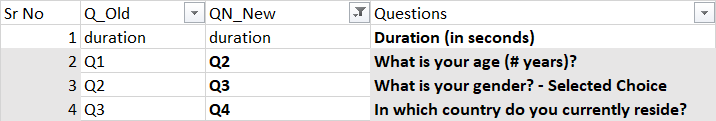

In [ ]:
# Let's us check how many missing values are there in 2017
# in col 2,3,4

temp_df = ks[['Year',2,3,4]]
temp_df[(temp_df['Year']=='2017')].isnull().any(axis=1).sum()

486

We can drop this 486 rows from the dataset and then we can add year 2017 in the analysis

In [ ]:
# checking the distribution of the age column
age = ['18-21', '22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+','nan']

fig = go.Figure()

for year in ks['Year'].unique():
    temp_df = ks[ks['Year'] == year]
    fig.add_trace(go.Histogram(x=temp_df[2], histnorm='probability',name=year))

fig.update_layout(barmode='overlay')
fig.update_xaxes(categoryorder='array', categoryarray= age)
fig.update_traces(opacity=0.6)
fig.show()

In [ ]:
# checking the distribution of the gender column

fig = go.Figure()

for year in ks['Year'].unique():
    temp_df = ks[ks['Year'] == year]
    fig.add_trace(go.Histogram(x=temp_df[3],histnorm='probability',name=year))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

In [ ]:
# checking the distribution of the gender column

fig = go.Figure()

for year in ks['Year'].unique():
    temp_df = ks[ks['Year'] == year]
    fig.add_trace(go.Histogram(x=temp_df[4],histnorm='probability',name=year))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.6)
fig.show()

In [ ]:
def chi2Test(df, alpha=0.05):
    '''
    The function helps in finding:
    - chi2 statistic
    - critical_value
    - p-value
    - degrees of freedom
    - alpha by default is 0.05
    '''

    print('Hypothesis testing')
    print('Null hypo: There is no difference in variable distribution')
    print('Alt hypo:  There significant variation in variable distribution')
    print('\n')

    chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(df)
    critical_value=chi2.ppf(q=1-alpha,df=dof)
    print("Result of Chi square test:\n")
    print(f"chi2 statistic:     {chi2_stat:.5g}")
    print(f"critical_value:     {critical_value}")
    print(f"p-value:            {p:.5g}")
    print(f"degrees of freedom: {dof}")
    print("\n")

    if p <= alpha:
        print("Reject Null Hypothesis")
    else:
        print("Accept Null Hypthesis")

# # Chi square 
# Observed_Values = pt02.values

# ev=scipy.stats.chi2_contingency(pt02)
# Expected_Values = ev[3]

# no_of_rows=pt02.shape[0]
# no_of_columns=pt02.shape[1]
# df=(no_of_rows-1)*(no_of_columns-1)
# print("Degree of Freedom:",df)

# chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
# chi_square_statistic=chi_square.sum()
# print("chi-square statistic:",chi_square_statistic)

# alpha = 0.05
# critical_value=chi2.ppf(q=1-alpha,df=dof)
# print('critical_value:',critical_value)

# #p-value

# p_value=1-chi2.cdf(x=chi_square_statistic,df=dof)
# print('p-value:',p_value)
# print('Significance level: ',alpha)
# print('Degree of Freedom: ',dof)
# print('p-value:',p_value)

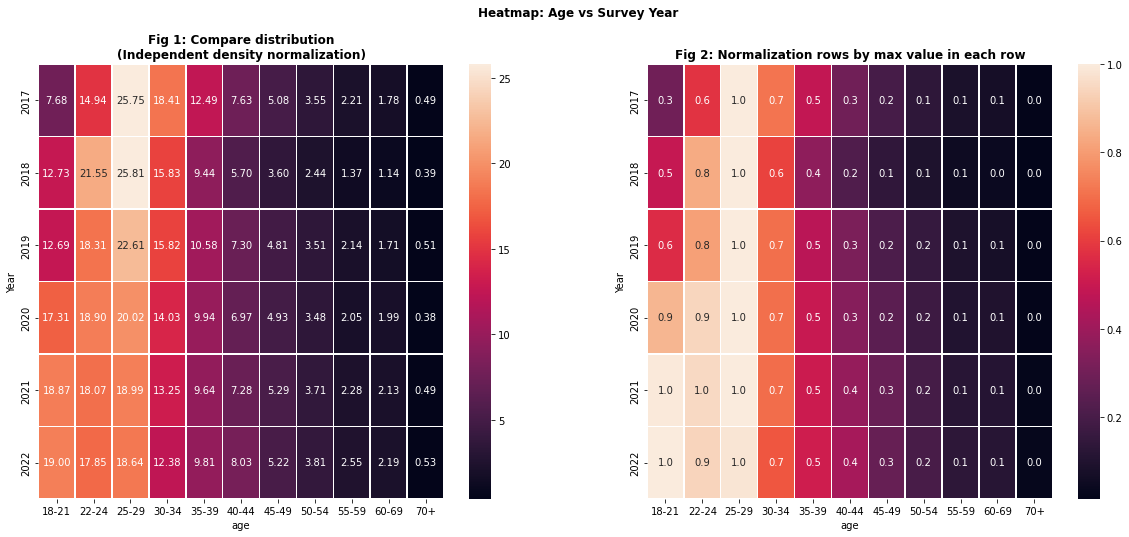

Check the fig.2 heatmap with normalized row by max value
- We can see the distribution is almost same from 2020 to 2022
- Density of 18-21,22-24 is less in 2019,2018,2017 compared to 2020 to 2022

Hypothesis testing
Null hypo: There is no difference in variable distribution
Alt hypo:  There significant variation in variable distribution


Result of Chi square test:

chi2 statistic:     14.683
critical_value:     67.5048065495412
p-value:            1
degrees of freedom: 50


Accept Null Hypthesis


In [ ]:
# Let's look at the values of the density over the year instead of chart

temp_df = ks.copy()
temp_df.rename(columns={2:'age',3:'gender',4:'country'},inplace=True)
pt01 = temp_df.pivot_table(values='sid',index=['Year'],columns='age',aggfunc='count')
pt01['total'] = pt01.sum(axis=1)
pt02 = pt01.div(pt01.total, axis=0).fillna(0) * 100
pt01 = pt01.drop('total', axis=1)
pt02 = pt02.drop('total', axis=1)

pt03 = pt02.div(pt02.max(axis=1), axis=0)

# # ploting sns heatmap
# fig, ax = plt.subplots(1,1,figsize=(10,8))
# sns.heatmap(pt02, annot=True, linewidths=.5, fmt=".2f", ax=ax)
# plt.show()

# ploting sns heatmap
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Heatmap: Age vs Survey Year', fontweight ="bold")
sns.heatmap(pt02, annot=True, linewidths=.5, fmt=".2f", ax=ax1)
sns.heatmap(pt03, annot=True, linewidths=.5, fmt=".1f", ax=ax2)

# Setting the axis title
ax1.set_title('Fig 1: Compare distribution\n(Independent density normalization)',fontweight ="bold")
ax2.set_title('Fig 2: Normalization rows by max value in each row',fontweight ="bold")

plt.show()

print("Check the fig.2 heatmap with normalized row by max value\n\
- We can see the distribution is almost same from 2020 to 2022\n\
- Density of 18-21,22-24 is less in 2019,2018,2017 compared to 2020 to 2022\n\
")

chi2Test(pt02)

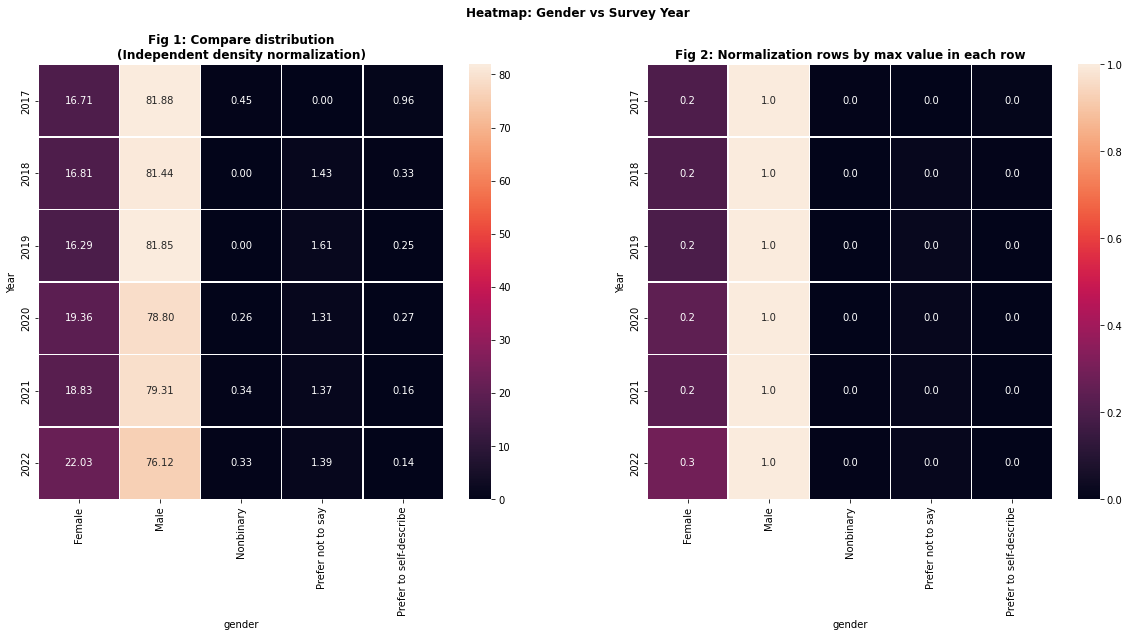

Check the fig.2 heatmap with normalized row by max value
Distribution is almost same across all categories.

Hypothesis testing
Null hypo: There is no difference in variable distribution
Alt hypo:  There significant variation in variable distribution


Result of Chi square test:

chi2 statistic:     5.1927
critical_value:     31.410432844230918
p-value:            0.99963
degrees of freedom: 20


Accept Null Hypthesis


In [ ]:
pt01 = temp_df.pivot_table(values='sid',index=['Year'],columns='gender',aggfunc='count')
pt01['total'] = pt01.sum(axis=1)
pt02 = pt01.div(pt01.total, axis=0).fillna(0) * 100
pt01 = pt01.drop('total', axis=1)
pt02 = pt02.drop('total', axis=1)

# # ploting sns heatmap
# fig, ax = plt.subplots(1,1,figsize=(10,8))
# sns.heatmap(pt02, annot=True, linewidths=.5, fmt=".2f", ax=ax)
# plt.show()

pt03 = pt02.div(pt02.max(axis=1), axis=0)

# ploting sns heatmap
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('Heatmap: Gender vs Survey Year', fontweight ="bold")
sns.heatmap(pt02, annot=True, linewidths=.5, fmt=".2f", ax=ax1)
sns.heatmap(pt03, annot=True, linewidths=.5, fmt=".1f", ax=ax2)

# Setting the axis title
ax1.set_title('Fig 1: Compare distribution\n(Independent density normalization)',fontweight ="bold")
ax2.set_title('Fig 2: Normalization rows by max value in each row',fontweight ="bold")

plt.show()

print("Check the fig.2 heatmap with normalized row by max value\n\
Distribution is almost same across all categories.\n")

chi2Test(pt02)

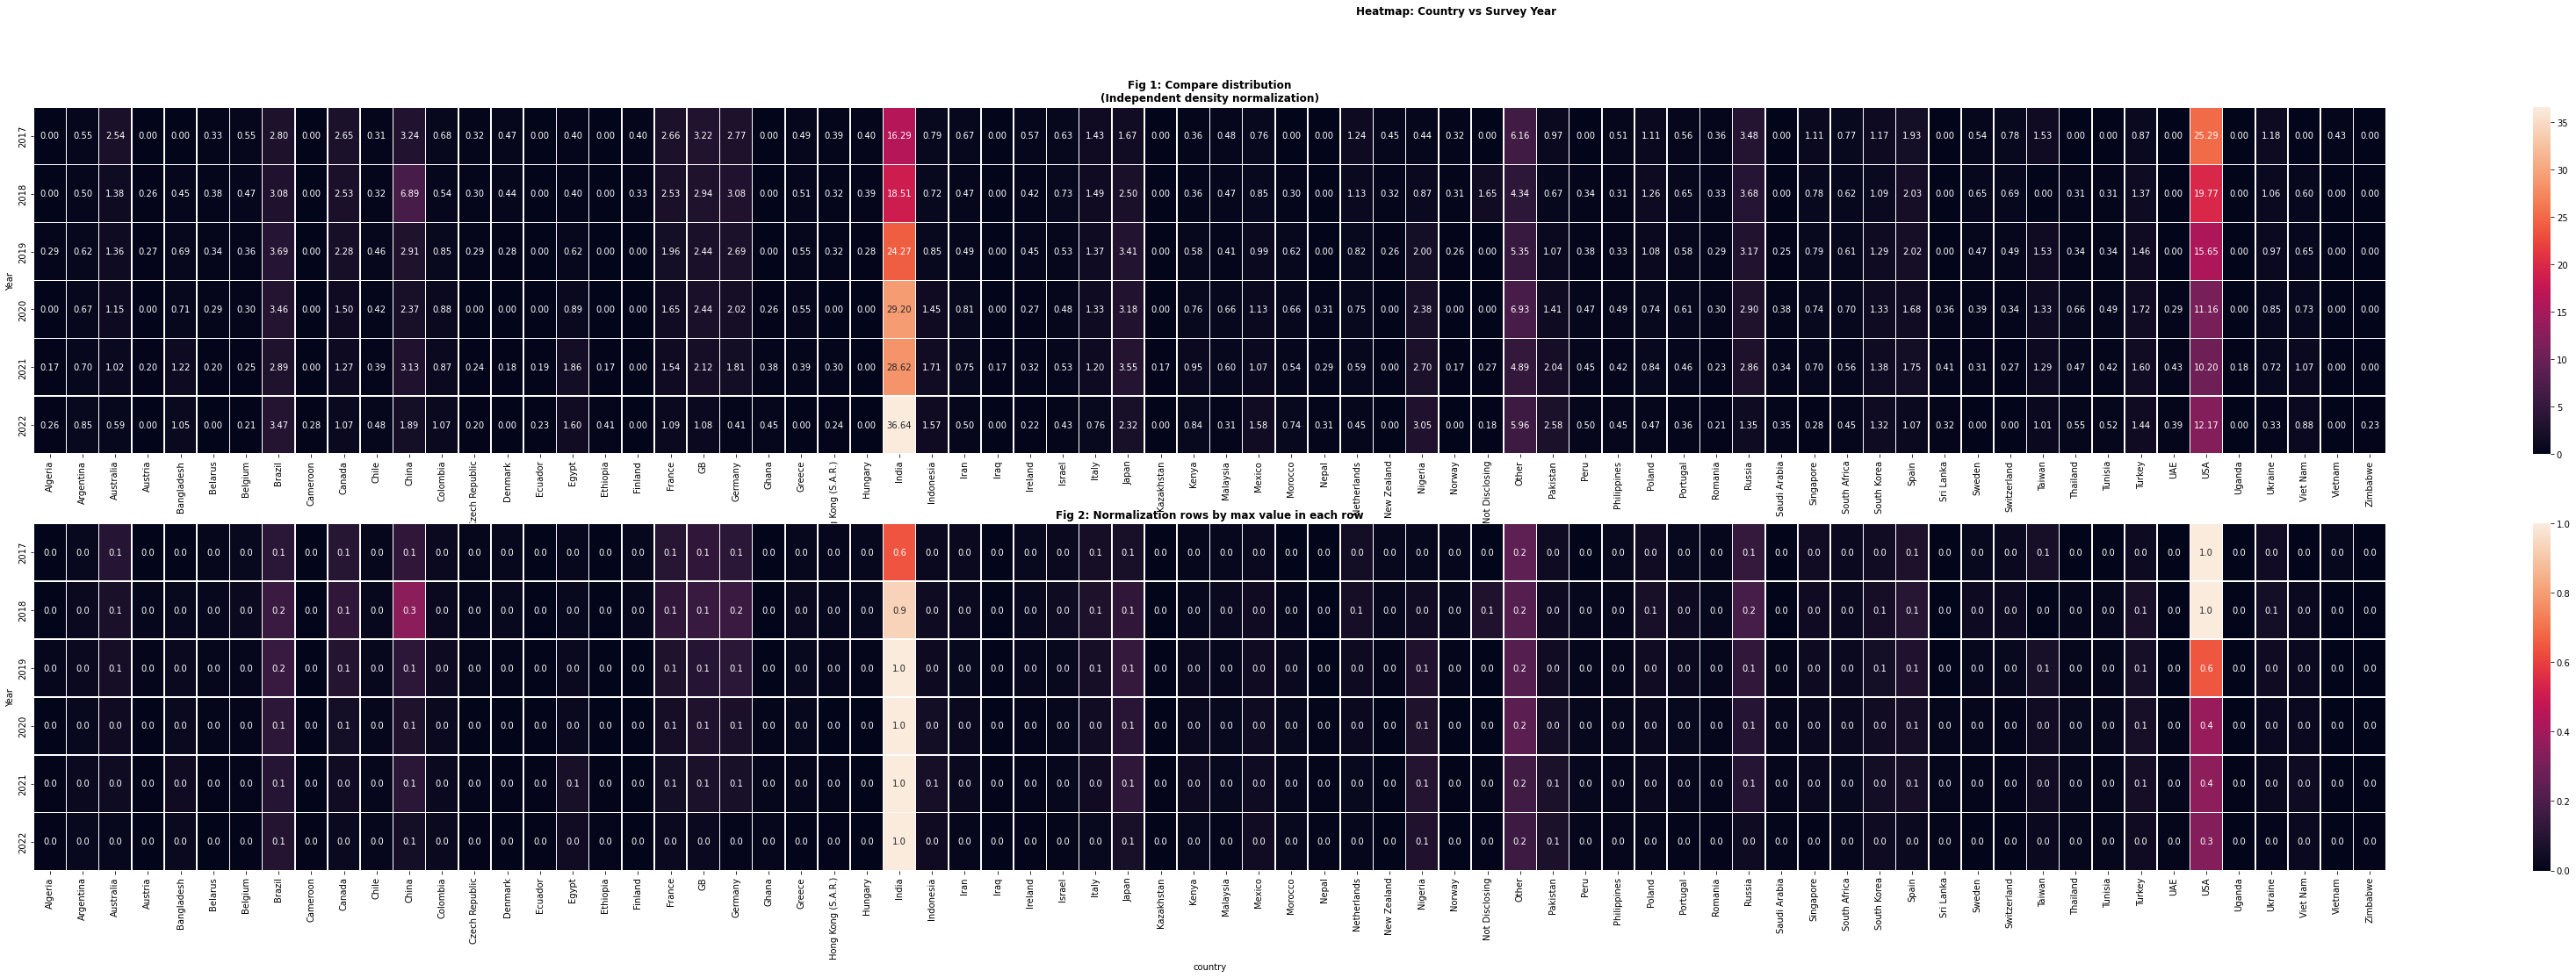

Check the fig.2 heatmap with normalized row by max value
Distribution is almost same across all categories except for USA for year 2017 to 2019 and India for 2017.

Hypothesis testing
Null hypo: There is no difference in variable distribution
Alt hypo:  There significant variation in variable distribution


Result of Chi square test:

chi2 statistic:     87.053
critical_value:     399.9357203936488
p-value:            1
degrees of freedom: 355


Accept Null Hypthesis


In [ ]:
pt01 = temp_df.pivot_table(values='sid',index=['Year'],columns='country',aggfunc='count')
pt01['total'] = pt01.sum(axis=1)
pt02 = pt01.div(pt01.total, axis=0).fillna(0) * 100
pt01 = pt01.drop('total', axis=1)
pt02 = pt02.drop('total', axis=1)

# # ploting sns heatmap
# fig, ax = plt.subplots(1,1,figsize=(50,8))
# sns.heatmap(pt02, annot=True, linewidths=.5, fmt=".2f", ax=ax)
# plt.show()

pt03 = pt02.div(pt02.max(axis=1), axis=0)

# ploting sns heatmap
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(60,16))
fig.suptitle('Heatmap: Country vs Survey Year', fontweight ="bold")
sns.heatmap(pt02, annot=True, linewidths=.5, fmt=".2f", ax=ax1)
sns.heatmap(pt03, annot=True, linewidths=.5, fmt=".1f", ax=ax2)

# Setting the axis title
ax1.set_title('Fig 1: Compare distribution\n(Independent density normalization)',fontweight ="bold")
ax2.set_title('Fig 2: Normalization rows by max value in each row',fontweight ="bold")

plt.show()

print("Check the fig.2 heatmap with normalized row by max value\n\
Distribution is almost same across all categories except for USA for year 2017 to 2019 and India for 2017.\n")

chi2Test(pt02)

Lets drop year 2017 from the dataset. We will do analysis for 5 years 2018 to 2022.

In [ ]:
ks1 = ks[ks['Year'] != '2017']
ks1.shape

(113582, 298)

Saving the files

In [ ]:
ks1.to_csv('/content/drive/MyDrive/ml-workspace/kaggle/comp/kaggle-survey/data/kaggle_survey_2018_2022.csv',index=False)

There is still data cleaning required, we will do it when we will analyze the individual questions. Survey 2022 will be the base for the data cleaning.

In [ ]:
ks[146][ks['Year']!='2022'].value_counts()

Student                             21242
Data Scientist                      16947
Data Analyst                        12736
Software Engineer                   12011
Other                               10339
Unemployed                           5422
Research Scientist                   5371
Manager                              3601
ML/MLops Engg                        3198
Data Engineer                        2466
Statistician                         1451
Scientist/Researcher                  978
Data Administrator                    784
Researcher                            619
Engineer (non-software)               552
Programmer                            462
Computer Scientist                    335
Developer Advocate                    216
Predictive Modeler                    181
Data Miner                            118
Operations Research Practitioner       58
Name: 146, dtype: int64

In [ ]:
ks1[146].unique()

array([nan, 'Data Scientist', 'Software Engineer', 'Research Scientist',
       'Other', 'Developer Advocate', 'Data Analyst', 'Data Engineer',
       'Unemployed', 'ML/MLops Engg', 'Engineer (non-software)',
       'Teacher / professor', 'Statistician', 'Manager',
       'Data Administrator', 'Data Architect', 'Student'], dtype=object)

In [ ]:
ks1[173].unique()

array([nan, 'They all had a similarly enjoyable developer experience',
       'Microsoft Azure', 'Alibaba Cloud', 'Amazon Web Services (AWS)',
       'None were satisfactory', 'Google Cloud Platform (GCP)',
       'VMware Cloud', 'IBM Cloud / Red Hat', 'Oracle Cloud', 'Other',
       'SAP Cloud', 'Tencent Cloud', 'Huawei Cloud'], dtype=object)

In [ ]:
ks.shape

(130298, 298)

In [ ]:
ks[5].value_counts()

No     12036
Yes    11961
Name: 5, dtype: int64

In [ ]:
ks[146][ks['Year']=='2022'].isnull().sum()

13367

In [ ]:
ks[146][(ks['Year']=='2022') & (ks[5]=='Yes')].isnull().sum()

11961